<a href="https://colab.research.google.com/github/mzndnes/Deep-Learning/blob/main/face-recognition_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import pandas as pd
df=pd.read_csv('./drive/My Drive/data/fer2013.csv')

print(df.head())
print(len(df))

   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training
35887


In [ ]:
import numpy as np
xtrain=[]
ytrain=[]
tr0,tr1,tr2,tr3,tr4,tr5,tr6=0,0,0,0,0,0,0

xtest=[]
ytest=[]
t,t0,t1,t2,t3,t4,t5,t6=0,0,0,0,0,0,0,0


for index, row in df.iterrows():
  if t==2800: #total images
    break
  val=row['pixels'].split(" ")
    
  if 'Training' in row['Usage']:
    if tr0<300 and row['emotion']==0:
      xtrain.append(np.array(val, dtype=np.float32))
      ytrain.append(0)
      tr0+=1
      t+=1
    elif tr1<300 and row['emotion']==1:
      xtrain.append(np.array(val, dtype=np.float32))
      ytrain.append(1)
      tr1+=1
      t+=1
    elif tr2<300 and row['emotion']==2:
      xtrain.append(np.array(val, dtype=np.float32))
      ytrain.append(2)
      tr2+=1
      t+=1
    elif tr3<300 and row['emotion']==3:
      xtrain.append(np.array(val, dtype=np.float32))
      ytrain.append(3)
      tr3+=1
      t+=1
    elif tr4<300 and row['emotion']==4:
      xtrain.append(np.array(val, dtype=np.float32))
      ytrain.append(4)
      tr4+=1
      t+=1
    elif tr5<300 and row['emotion']==5:
      xtrain.append(np.array(val, dtype=np.float32))
      ytrain.append(5)
      tr5+=1
      t+=1
    elif tr6<300 and row['emotion']==6:
      xtrain.append(np.array(val, dtype=np.float32))
      ytrain.append(6)
      tr6+=1
      t+=1
      
  elif 'Test' in row['Usage']:
    if t0<100 and row['emotion']==0:
      xtest.append(np.array(val, dtype=np.float32))
      ytest.append(0)
      t0+=1
      t+=1
    elif t1<100 and row['emotion']==1:
      xtest.append(np.array(val, dtype=np.float32))
      ytest.append(1)
      t1+=1
      t+=1
    elif t2<100 and row['emotion']==2:
      xtest.append(np.array(val, dtype=np.float32))
      ytest.append(2)
      t2+=1
      t+=1
    elif t3<100 and row['emotion']==3:
      xtest.append(np.array(val, dtype=np.float32))
      ytest.append(3)
      t3+=1
      t+=1
    elif t4<100 and row['emotion']==4:
      xtest.append(np.array(val, dtype=np.float32))
      ytest.append(4)
      t4+=1
      t+=1
    elif t5<100 and row['emotion']==5:
      xtest.append(np.array(val, dtype=np.float32))
      ytest.append(5)
      t5+=1
      t+=1
    elif t6<100 and row['emotion']==6:
      xtest.append(np.array(val, dtype=np.float32))
      ytest.append(6)
      t6+=1
      t+=1
    
   
   

In [ ]:

xtrain = np.array(xtrain,'float32')
ytrain = np.array(ytrain,'float32')
xtest = np.array(xtest,'float32')
ytest = np.array(ytest,'float32')
print(xtrain.shape)
print(xtest.shape)

(2100, 2304)
(700, 2304)


In [ ]:

#normalizing data between oand 1
xtrain -= np.mean(xtrain, axis=0)
xtrain /= np.std(xtrain, axis=0)

xtest -= np.mean(xtest, axis=0)
xtest /= np.std(xtest, axis=0)

xtrain = xtrain.reshape(xtrain.shape[0], 48, 48, 1)

xtest = xtest.reshape(xtest.shape[0], 48, 48, 1)

In [ ]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Dropout,Dense, Flatten

num_labels = 7
##designing the cnn
#1st convolution layer
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(xtrain.shape[1:])))
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_labels, activation='softmax'))

model.summary()



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 20, 20, 64)        36928     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 18, 18, 64)        36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 9, 9, 64)         

In [ ]:
# from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

#Compliling the model
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
# from keras.utils import np_utils
ytrain=np_utils.to_categorical(ytrain, num_classes=num_labels)
ytest=np_utils.to_categorical(ytest, num_classes=num_labels)

In [ ]:

batch_size = 64
epochs = 30


his=model.fit(xtrain, ytrain,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(xtest, ytest),
          shuffle=True)


#Saving the  model to  use it later on
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer.h5")

Epoch 1/30
33/33 [==============================] - 42s 1s/step - loss: 0.4634 - accuracy: 0.8557 - val_loss: 2.6676 - val_accuracy: 0.3657
Epoch 2/30
33/33 [==============================] - 42s 1s/step - loss: 0.3819 - accuracy: 0.8681 - val_loss: 3.1084 - val_accuracy: 0.3586
Epoch 3/30
33/33 [==============================] - 42s 1s/step - loss: 0.4050 - accuracy: 0.8576 - val_loss: 2.9854 - val_accuracy: 0.3700
Epoch 4/30
33/33 [==============================] - 42s 1s/step - loss: 0.3581 - accuracy: 0.8800 - val_loss: 3.0489 - val_accuracy: 0.3629
Epoch 5/30
33/33 [==============================] - 42s 1s/step - loss: 0.3097 - accuracy: 0.9005 - val_loss: 3.1239 - val_accuracy: 0.3700
Epoch 6/30
33/33 [==============================] - 42s 1s/step - loss: 0.2385 - accuracy: 0.9181 - val_loss: 3.5867 - val_accuracy: 0.3457
Epoch 7/30
33/33 [==============================] - 42s 1s/step - loss: 0.2313 - accuracy: 0.9195 - val_loss: 3.7884 - val_accuracy: 0.3657
Epoch 8/30
33/33 [==

<Figure size 432x288 with 0 Axes>

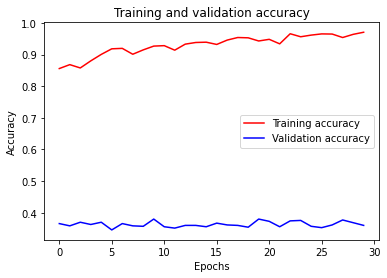

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
train_acc =his.history['accuracy']

val_acc = his.history['val_accuracy']
epochs = range(len(train_acc))

plt.plot(epochs, train_acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=0)
plt.figure()

In [ ]:
test_loss, test_accuracy = model.evaluate(xtest, ytest)
print(test_accuracy)

22/22 [==============================] - 3s 138ms/step - loss: 4.2865 - accuracy: 0.3600
0.36000001430511475
